# Visualize subset of the feature matrix

In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
feature_df = pandas.read_table('features/transformed-features.tsv.bz2', low_memory=False)

In [3]:
feature_df.head(2)

,compound_id,compound_name,disease_id,disease_name,category,status,prior_prob,prior_logit,degree_CbG,degree_CcSE,...,dwpc_CuGaDuGaD,dwpc_CuGcG<rGaD,dwpc_CuGcGiGaD,dwpc_CuGdDpSpD,dwpc_CuGr>GbCtD,dwpc_CuGuCrCtD,dwpc_CuGuCtD,dwpc_CuGuCtDrD,dwpc_CuGuCuGaD,dwpc_CuGuDuGaD
0,DB01048,Abacavir,DOID:10652,Alzheimer's disease,NaN,0,0.004753,-5.344,-0.2955,0.8146,...,-0.5028,-0.4211,-0.4581,-0.5399,-0.357,-0.3849,-0.375,-0.5642,-0.5555,-0.4952
1,DB05812,Abiraterone,DOID:10652,Alzheimer's disease,NaN,0,0.004753,-5.344,0.5495,0.5554,...,-0.5028,-0.4211,-0.4581,-0.5399,-0.357,-0.3849,-0.375,-0.5642,-0.5555,-0.4952


In [4]:
feature_df = feature_df.query("prior_prob > 0")

In [5]:
metapaths = [
    'CbGaD',
    'CbGiGaD',
    'CbGpPWpGaD',
    'CbGeAlD',
    'CcSEcCtD',
    'CuGuCtD',
    'CdGdCtD',
]

features = ['dwpc_' + metapath for metapath in metapaths]
renamer = {'dwpc_' + metapath: metapath for metapath in metapaths}

In [6]:
subset_df = (feature_df
    .assign(name = feature_df.compound_name + '–' + feature_df.disease_name)
    .groupby('status')
    .apply(lambda df: df.sample(n=6, random_state=8))
    .set_index(['name'])
    [['status', 'prior_logit'] + features]
    .rename(columns=renamer)
)
subset_df.head(2)

,status,prior_logit,CbGaD,CbGiGaD,CbGpPWpGaD,CbGeAlD,CcSEcCtD,CuGuCtD,CdGdCtD
name,,,,,,,,,
Calcitriol–dilated cardiomyopathy,0,-4.911,-0.358,1.5360,-0.2313,-0.71350,0.75460,-0.375,1.1030
Nilutamide–metabolic syndrome X,0,-6.757,-0.358,0.6863,0.7708,0.02763,0.01044,-0.375,-0.4084


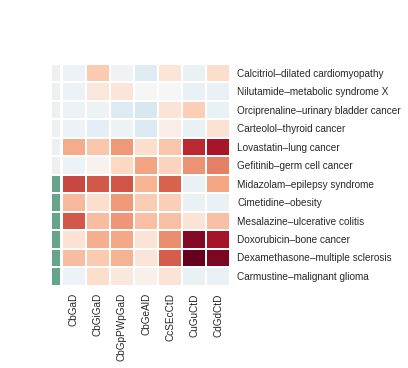

In [7]:
status_colors = subset_df.status.map({0: '#ECF0F1', 1: '#66A58B'})
heatmap_df = subset_df.drop(['status', 'prior_logit'], axis=1)
grid = seaborn.clustermap(heatmap_df, row_cluster=False,
    col_cluster=False, row_colors=status_colors, figsize=(4, 5),
    linewidths=1)
grid.cax.set_visible(False)
plt.setp(grid.ax_heatmap.get_yticklabels(), rotation=0);
grid.ax_heatmap.set_ylabel("");

In [8]:
grid.savefig('figure/example-feature-matrix.svg', bbox_inches='tight', transparent=True)

In [9]:
# Convert to PNG and trim whitespace
! convert -density 300 figure/example-feature-matrix.svg -trim +repage figure/example-feature-matrix.png